# 02. Neural Network Classification with PyTorch

Resources used: https://www.learnpytorch.io/02_pytorch_classification/

In [2]:
import sklearn
from sklearn.datasets import  make_circles

import matplotlib.pyplot as plt
import numpy as np

In [3]:
n_samples = 1000
X, y = make_circles(n_samples = n_samples,
                    noise = 0.03,
                    random_state=42)
print(f"First 3 samples of X: \n {X[:3]}\n")
print(f"First 3 samples of y:\n {y[:3]}")

First 3 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]]

First 3 samples of y:
 [1 1 1]


In [4]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "y":y})
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


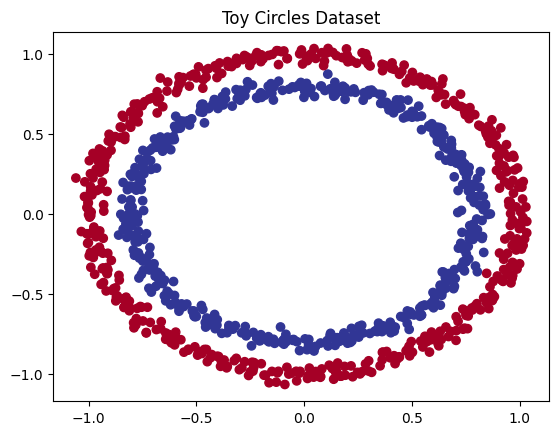

In [5]:
plt.scatter(x = circles["X1"],
            y = circles["X2"],
            c = y,
            cmap = plt.cm.RdYlBu)
plt.title("Toy Circles Dataset")
plt.show()

* Toy datasets like these ones help us practice our fundementals.

## 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [16]:
X_sample = X[0]
y_sample = y[0]
print(f"One sample of X: {X_sample} & one sample of y: {y_sample}")
print(f"shape of X: {X.shape} & shape of y: {y_sample.shape}")

One sample of X: [0.75424625 0.23148074] & one sample of y: 1
shape of X: (1000, 2) & shape of y: ()


## 1.2 Turn data into tenors and create train and test splits

In [20]:
# Turning data into tensors
import torch
torch.__version__

'2.6.0+cu124'

In [22]:
#type(X): Shows the Python data type of the X variable. At this point, it will be a NumPy array.
#X.dtype: Shows the data type of the elements within the X array (e.g., float64).
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [21]:
print(f"The X array is of data type: {type(X)}")
print(f"The y array is of data type: {type(y)}")

The X array is of data type: <class 'numpy.ndarray'>
The y array is of data type: <class 'numpy.ndarray'>


In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)